In [1]:
import pandas

In [2]:
import pandas as pd

In [3]:
wichita = pd.read_csv("https://datajournalism.tech/wp-content/uploads/2019/10/wichita.csv")
four = wichita[wichita.subject_race != "other/unknown"]
four.head()
population = pd.DataFrame({"subject_race":["white", "black", "asian/pacific islander", "hispanic"], "num_people": [246343, 42679, 19272, 63659]}, columns=["subject_race", "num_people"])
population.head()

,subject_race,num_people
0,white,246343
1,black,42679
2,asian/pacific islander,19272
3,hispanic,63659


In [4]:
race = four.subject_race.value_counts().reset_index()

In [5]:
race = race.rename(columns={"index":"subject_race", "subject_race":"count"})

In [6]:
race

,subject_race,count
0,white,32061
1,black,8038
2,hispanic,6709
3,asian/pacific islander,1607


In [7]:
population

,subject_race,num_people
0,white,246343
1,black,42679
2,asian/pacific islander,19272
3,hispanic,63659


In [8]:
stops = pd.merge(race,population, on="subject_race")


In [9]:
stops["stops_rate"] = stops["count"]/stops["num_people"]

In [10]:
stops

,subject_race,count,num_people,stops_rate
0,white,32061,246343,0.130148
1,black,8038,42679,0.188336
2,hispanic,6709,63659,0.105390
3,asian/pacific islander,1607,19272,0.083385


In [11]:
stops = stops.sort_values("stops_rate", ascending=False)

In [12]:
stops

,subject_race,count,num_people,stops_rate
1,black,8038,42679,0.188336
0,white,32061,246343,0.130148
2,hispanic,6709,63659,0.105390
3,asian/pacific islander,1607,19272,0.083385


In [13]:
%matplotlib inline

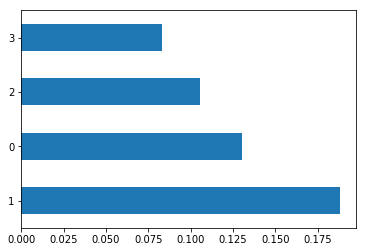

In [14]:
stops.stops_rate.plot.barh()

[Text(0,0,'black'),
 Text(0,0,'white'),
 Text(0,0,'hispanic'),
 Text(0,0,'asian/pacific islander')]

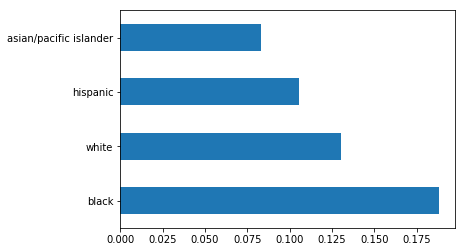

In [18]:
chart = stops.stops_rate.plot.barh()
chart.set_yticklabels(stops.subject_race)

In [20]:
stops.to_csv("stops.csv")

In [21]:
new = stops.drop(["num_people", "count"], axis=1)